This project presents an exploratory data analysis (EDA) of the 'BOOKS_DATA_CLEAN' dataset, which includes information on book sales, ratings, author profiles, and publisher details. The primary objective is to uncover trends, patterns, and actionable insights that shed light on factors influencing book sales. The analysis focuses on answering the following key questions:

1) Which genres have the highest gross sales (total revenue)?

2) Do Intermediate/Expert authors achieve higher unit sales compared to Novice authors?

3) Is there a relationship between book ratings and the number of units sold?

4) Which publishers lead in terms of total revenue and total units sold?

5) How does sale price impact a book's sales rank?

Key Findings:
1) Genre Sales Dominance
    Genre fiction generates the highest gross sales, accounting for a significant share of total revenue across the dataset.

2) Author Experience and Sales Volume
    Books authored by Intermediate and Expert writers consistently achieve higher unit sales 
    Notably, books authored by novice writers tend to have a higher average sale price, despite their lower sales volume.

3) Ratings and Sales Performance

    Famous authors generally receive higher average ratings.

    However, books by Intermediate authors tend to sell the most units, suggesting that strong unit sales do not always correlate directly with author fame or high ratings.

4) Publisher Performance

    Amazon Digital Services dominates in unit sales, accounting for approximately 58.2% of total units sold.

    Penguin Publishing appears to price books at a premium, generating higher total revenue despite selling fewer units—indicating a value-over-volume strategy.

5) Price vs. Sales Rank Correlation

    A negative correlation exists between book sale price and units sold, 
    suggesting that lower-priced books tend to sell more units. 
    This underscores the importance of pricing strategy in maximizing sales volume

In [11]:
# importing the necessary libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('Books_Data_Clean.csv')
df.head()


,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [ ]:
#dropping the index column which is unnecessary
# lowering the column names 
df.drop(columns="index",inplace=True)

df.columns=[x.lower() for x in df.columns]
df.head()

,publishing year,book name,author,language_code,author_rating,book_average_rating,book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,publisher,units sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [15]:
df.columns=df.columns.str.strip().str.replace(' ','_')

In [16]:
df.describe()

,publishing_year,book_average_rating,book_ratings_count,gross_sales,publisher_revenue,sale_price,sales_rank,units_sold
count,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [17]:
df=df[df["publishing_year"]>1900]


In [18]:
df.isna().sum()

publishing_year         0
book_name              21
author                  0
language_code          49
author_rating           0
book_average_rating     0
book_ratings_count      0
genre                   0
gross_sales             0
publisher_revenue       0
sale_price              0
sales_rank              0
publisher               0
units_sold              0
dtype: int64

In [20]:
#dropping the rows with missing book names  
df.dropna(subset="book_name",inplace = True)
df.isna().sum()

df.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_11144\2370820043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset="book_name",inplace = True)


(988, 14)

In [22]:
#checking whether the rows are dupliicated
df.duplicated().sum()

0

In [23]:
df.isna().sum()

publishing_year         0
book_name               0
author                  0
language_code          47
author_rating           0
book_average_rating     0
book_ratings_count      0
genre                   0
gross_sales             0
publisher_revenue       0
sale_price              0
sales_rank              0
publisher               0
units_sold              0
dtype: int64

In [24]:
df["language_code"].fillna("unknown",inplace=True)
df.isna().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_11144\932736335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["language_code"].fillna("unknown",inplace=True)


publishing_year        0
book_name              0
author                 0
language_code          0
author_rating          0
book_average_rating    0
book_ratings_count     0
genre                  0
gross_sales            0
publisher_revenue      0
sale_price             0
sales_rank             0
publisher              0
units_sold             0
dtype: int64

In [25]:
df.shape

(988, 14)

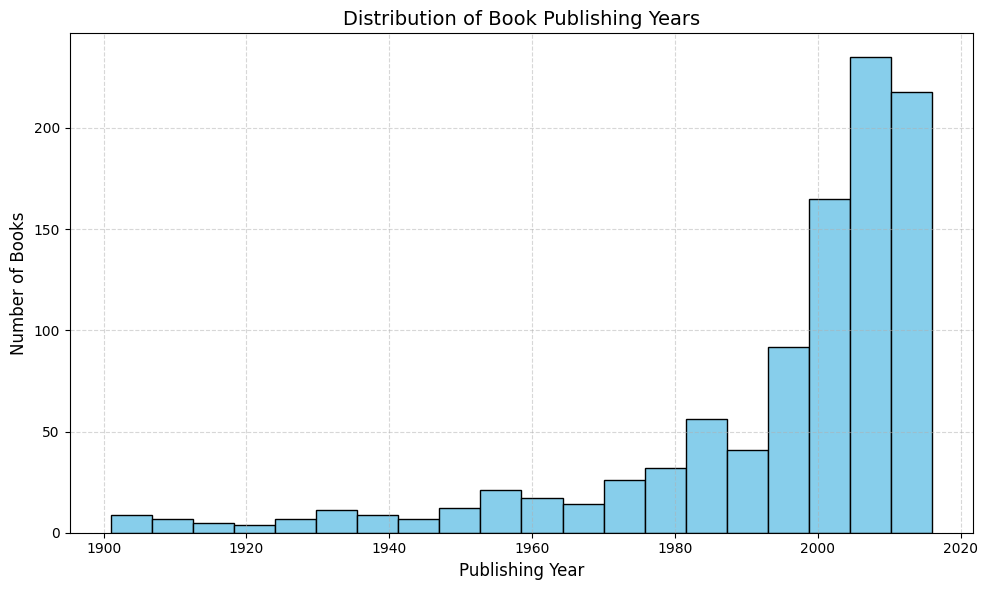

In [28]:
#to gain knowledge that which in which year the books are published the most
plt.figure(figsize=(10,6))  # Bigger figure size
plt.hist(df["publishing_year"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Book Publishing Years", fontsize=14)
plt.xlabel("Publishing Year", fontsize=12)
plt.ylabel("Number of Books", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


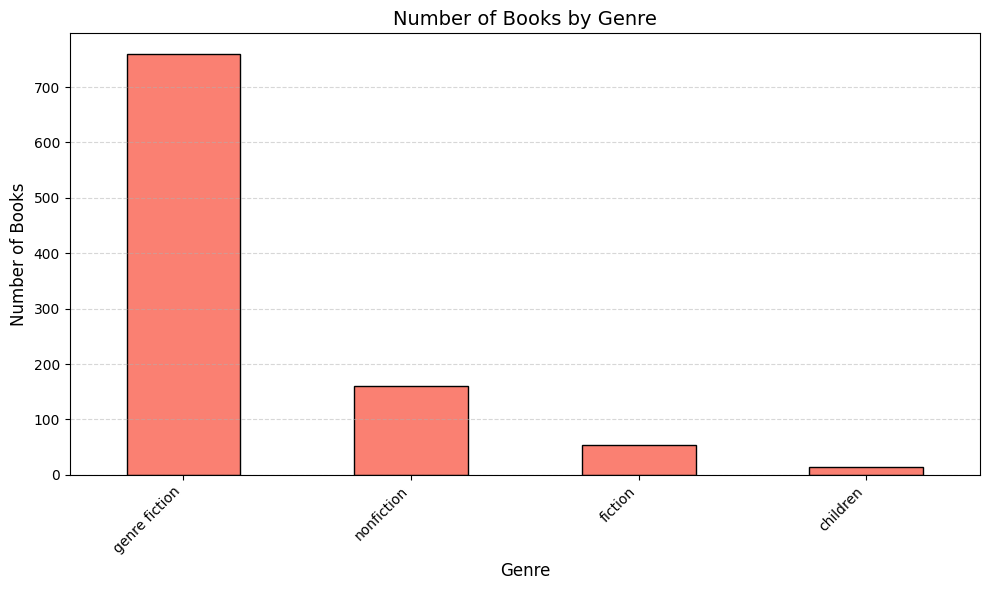

In [30]:
# Number of books sold with respect to genre 
plt.figure(figsize=(10,6))  # Bigger size
df["genre"].value_counts().plot(kind="bar", color="salmon", edgecolor="black")

plt.title("Number of Books by Genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Books", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Tilt x-labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [32]:
df.groupby("author")["book_average_rating"].mean().sort_values(ascending=False)

author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: book_average_rating, Length: 669, dtype: float64

In [40]:
df["genre"].value_counts()

genre
genre fiction    759
nonfiction       160
fiction           54
children          15
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_11144\2170596209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="genre", y="book_ratings_count", data=df, palette="Set2")


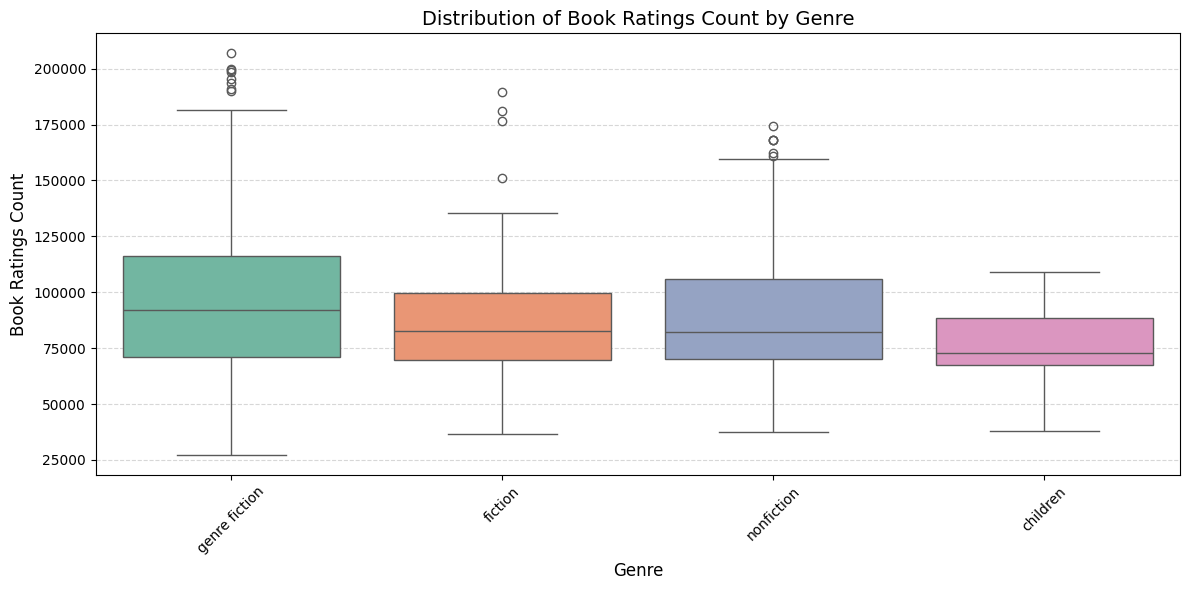

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="genre", y="book_ratings_count", data=df, palette="Set2")

plt.title("Distribution of Book Ratings Count by Genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Book Ratings Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

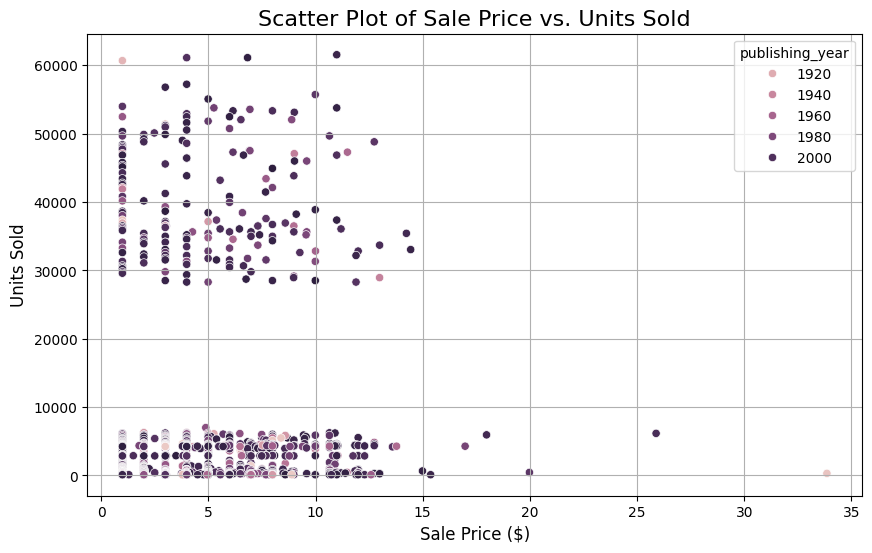

In [46]:
#this shows that less the sale price more the units sold and clearly we can we see that recently published books are sold the most
plt.figure(figsize=(10, 6))  # Set figure size


sns.scatterplot(x="sale_price", y="units_sold", data=df,hue="publishing_year")


plt.title("Scatter Plot of Sale Price vs. Units Sold", fontsize=16)
plt.xlabel("Sale Price ($)", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)

plt.grid(True)

plt.show()

Data engineering involves the process of collecting, transforming, and organizing data to facilitate analysis and decision-making.
So now we are going to make new columns

In [50]:
df["author_rating"].value_counts()

author_rating
Intermediate    576
Excellent       336
Famous           48
Novice           28
Name: count, dtype: int64

In [92]:
ratings={"Intermediate":3,
"Excellent":2,
"Famous":1,
"Novice":4}
df["author_rank"]=df["author_rating"].map(ratings)
df["age"]=2025-df["publishing_year"]

df.head()

,publishing_year,book_name,author,language_code,author_rating,book_average_rating,book_ratings_count,genre,gross_sales,publisher_revenue,sale_price,sales_rank,publisher,units_sold,age,author_rank
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,50.0,4
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,38.0,3
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,10.0,4
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500,17.0,3
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750,14.0,3


<Axes: xlabel='genre', ylabel='publisher_revenue'>

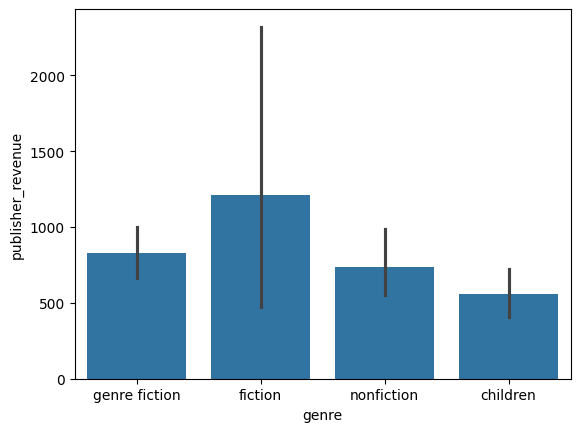

In [95]:
sns.barplot(data=df,x="genre",y="publisher_revenue")

c:\Users\HP\web\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\web\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\web\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\web\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


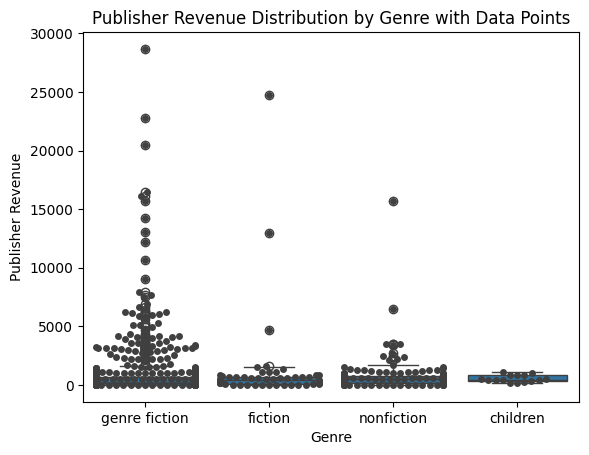

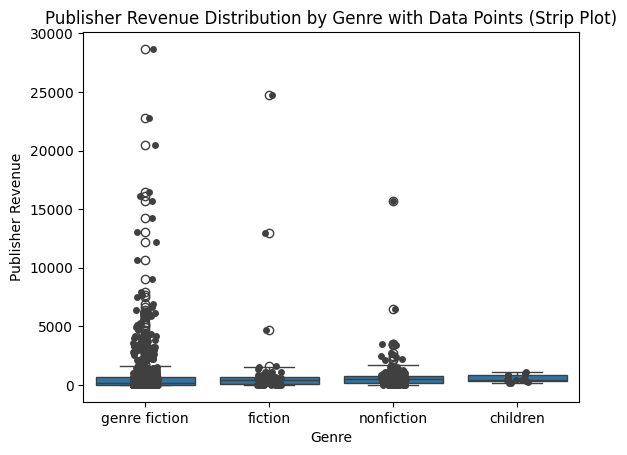

In [96]:
sns.boxplot(data=df, x="genre", y="publisher_revenue")
sns.swarmplot(data=df, x="genre", y="publisher_revenue", color=".25")
plt.xlabel("Genre")
plt.ylabel("Publisher Revenue")
plt.title("Publisher Revenue Distribution by Genre with Data Points")
plt.show()

# Or with a strip plot:
sns.boxplot(data=df, x="genre", y="publisher_revenue")
sns.stripplot(data=df, x="genre", y="publisher_revenue", color=".25")
plt.xlabel("Genre")
plt.ylabel("Publisher Revenue")
plt.title("Publisher Revenue Distribution by Genre with Data Points (Strip Plot)")
plt.show()

In [100]:
df.groupby("genre")["publisher_revenue"].sum()

genre
children           8341.332
fiction           65251.464
genre fiction    628962.798
nonfiction       118004.820
Name: publisher_revenue, dtype: float64

<Axes: xlabel='author_rating', ylabel='units_sold'>

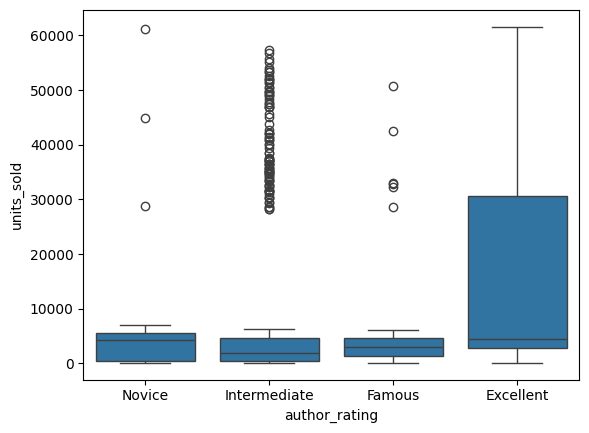

In [ ]:
sns.barplot(df,x="author_rating",y="units_sold")

In [107]:
df.groupby("author_rating")["sale_price"].sum()

author_rating
Excellent       1751.54
Famous           191.64
Intermediate    2656.36
Novice           157.48
Name: sale_price, dtype: float64

<Axes: xlabel='author_rating', ylabel='sale_price'>

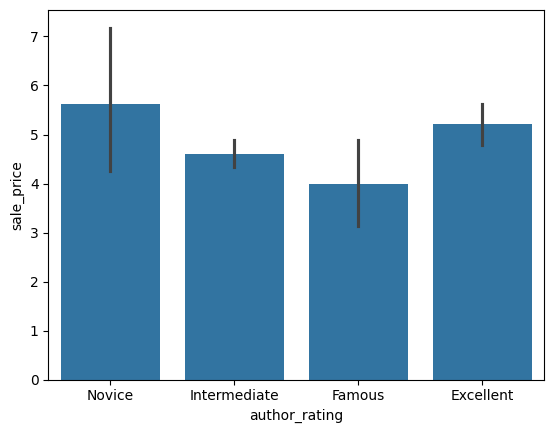

In [108]:
sns.barplot(df,x="author_rating",y="sale_price")

<Axes: xlabel='book_average_rating', ylabel='book_ratings_count'>

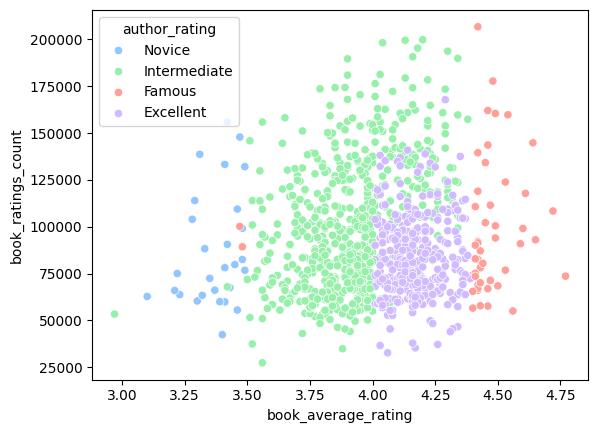

In [131]:
sns.scatterplot(data=df,x="book_average_rating",y="book_ratings_count",hue="author_rating")

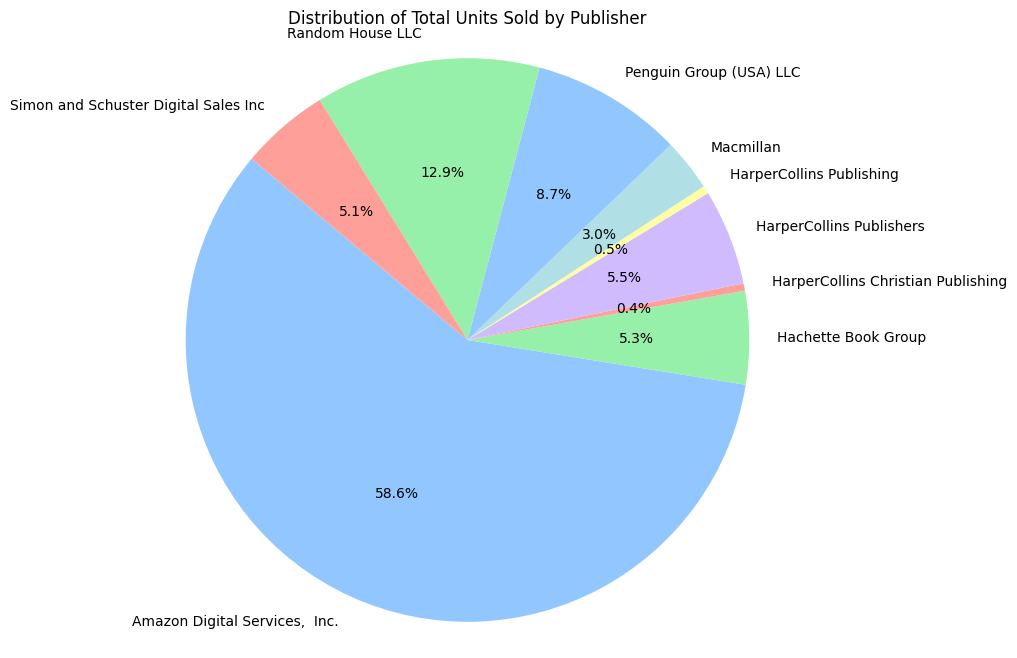

In [ ]:
publisher_sales = df.groupby('publisher')['units_sold'].sum()

# 2. Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(publisher_sales, 
        labels=publisher_sales.index,  # Use publisher names as labels
        autopct='%1.1f%%',             # Display percentage with one decimal place
        startangle=140,                # Rotate the starting angle for better layout (optional)
        textprops={'fontsize': 10})    
plt.title('Distribution of Total Units Sold by Publisher')
plt.axis('equal')                   
plt.show()

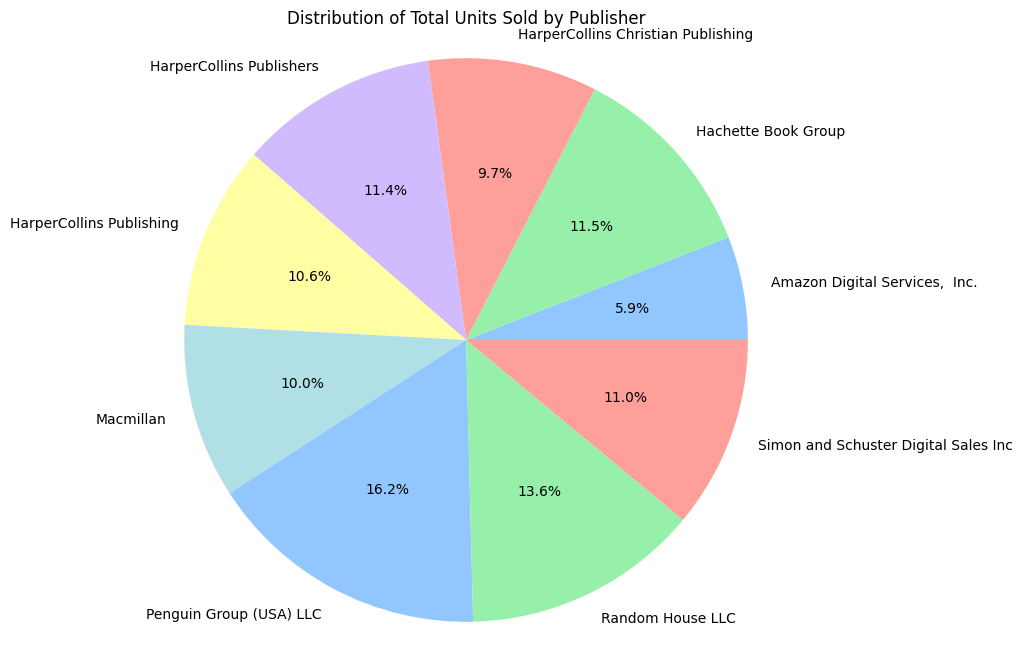

In [148]:
publisher_sales = df.groupby('publisher')['sale_price'].mean()

plt.figure(figsize=(8, 8)) 
plt.pie(publisher_sales, 
        labels=publisher_sales.index, 
        autopct='%1.1f%%',             
        textprops={'fontsize': 10})    
plt.title('Distribution of Total Units Sold by Publisher')
plt.axis('equal')                   
plt.show()

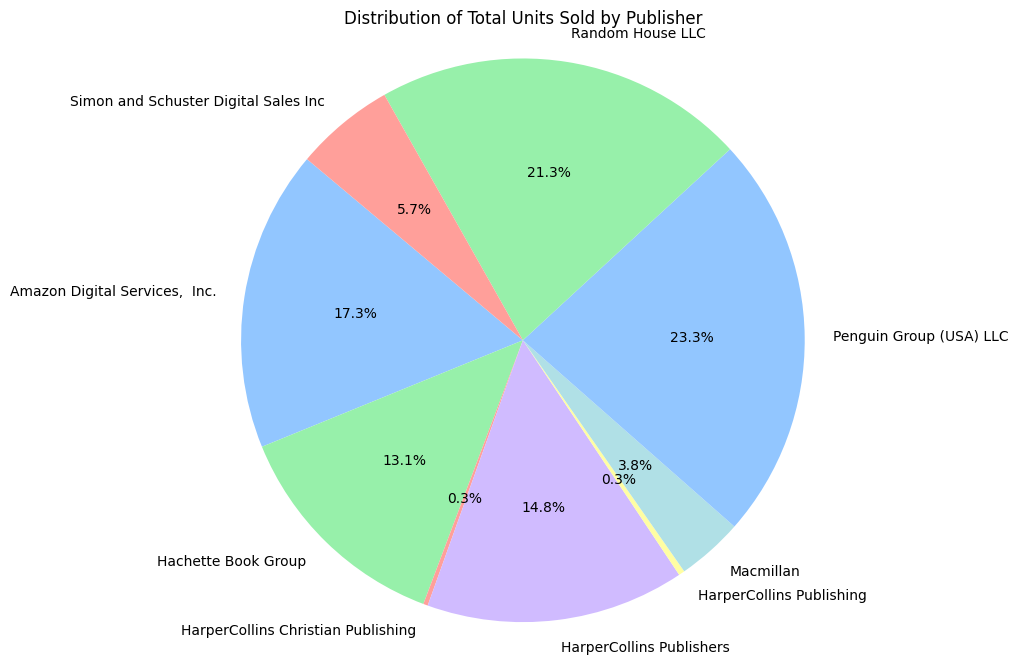

In [138]:
publisher_sales = df.groupby('publisher')['publisher_revenue'].sum()

# 2. Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(publisher_sales, 
        labels=publisher_sales.index,  # Use publisher names as labels
        autopct='%1.1f%%',             # Display percentage with one decimal place
        startangle=140,                # Rotate the starting angle for better layout (optional)
        textprops={'fontsize': 10})    
plt.title('Distribution of Total Units Sold by Publisher')
plt.axis('equal')                   
plt.show()